In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [2]:
# Load the dataset
file_path = r"C:\Users\user\Downloads\nepsealpha_export_price_NEPSE_2020-07-11_2024-09-11.csv"
data = pd.read_csv(file_path)

In [3]:
data

,Symbol,Date,Open,High,Low,Close,Percent Change,Volume
0,NEPSE,2024-09-11,2636.30,2651.19,2601.91,2610.21,-0.86 %,"6,851,179,051.18"
1,NEPSE,2024-09-10,2648.07,2688.26,2616.98,2632.94,-0.49 %,"7,245,568,421.39"
2,NEPSE,2024-09-09,2702.57,2706.54,2637.71,2646.03,-2.06 %,"9,439,106,425.54"
3,NEPSE,2024-09-08,2732.83,2760.45,2697.84,2701.90,-0.93 %,"10,122,408,249.12"
4,NEPSE,2024-09-05,2740.21,2758.92,2686.62,2727.36,-0.44 %,"9,651,513,246.31"
...,...,...,...,...,...,...,...,...
988,NEPSE,2020-07-16,1364.24,1395.82,1362.62,1394.77,0.00 %,"1,041,770,867.00"
989,NEPSE,2020-07-15,1347.88,1367.82,1347.88,1362.34,0.00 %,"1,160,491,522.00"
990,NEPSE,2020-07-14,1344.42,1349.24,1340.66,1347.44,0.00 %,"994,545,109.00"
991,NEPSE,2020-07-13,1342.59,1352.69,1334.17,1342.40,0.00 %,"1,088,716,118.00"


In [4]:
# Convert 'Date' column to datetime and set it as index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [5]:
# Select the 'Close' column
close_data = data['Close'].dropna().sort_index()

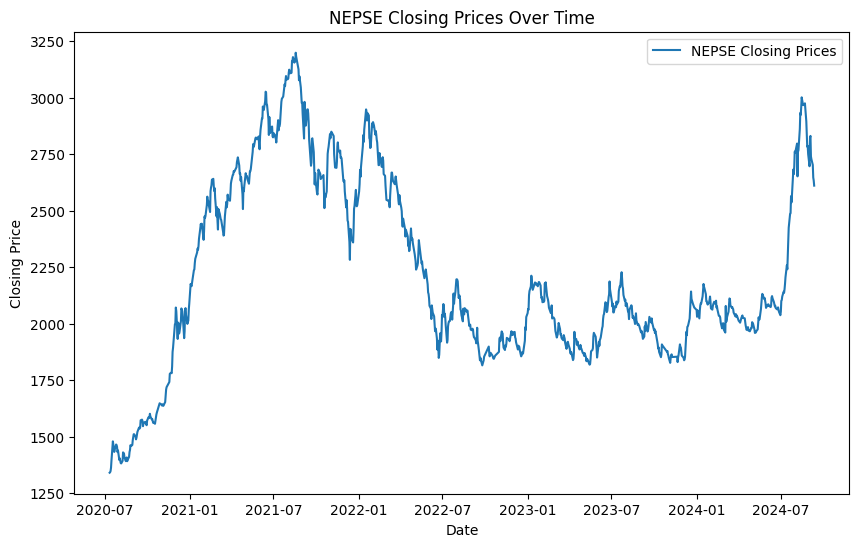

In [6]:
# Plot the original time series data
plt.figure(figsize=(10, 6))
plt.plot(close_data, label='NEPSE Closing Prices')
plt.title('NEPSE Closing Prices Over Time')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.legend()
plt.show()

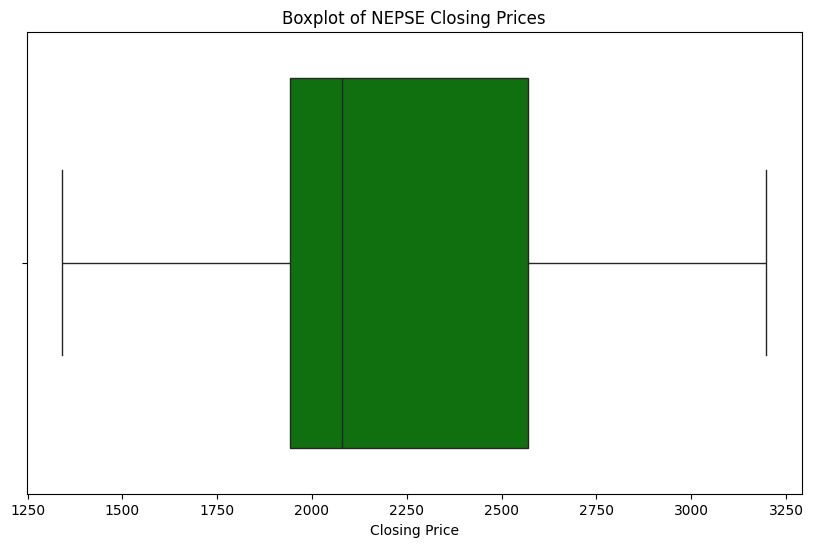

In [80]:
#Boxplot to identify spread and outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=close_data, color='green', vert=False)
plt.title('Boxplot of NEPSE Closing Prices')
plt.xlabel('Closing Price')
plt.show()

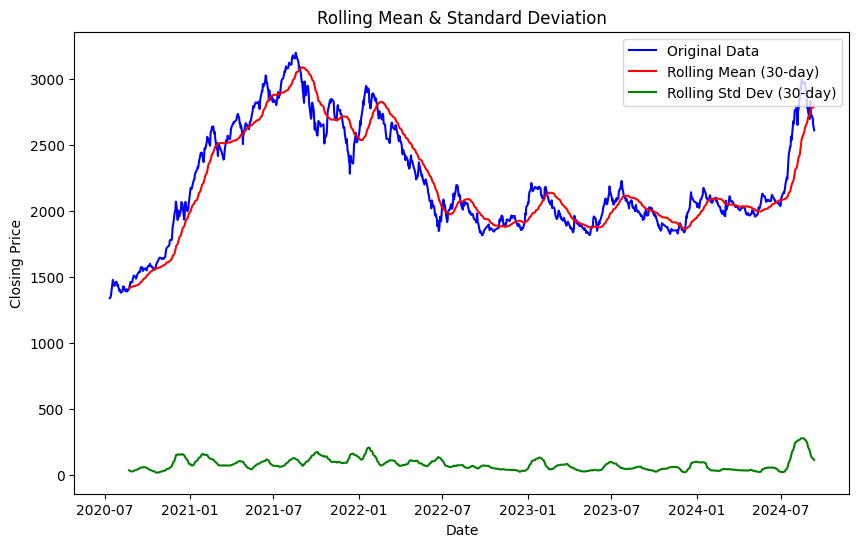

In [8]:
# Rolling Mean and Rolling Std Deviation
plt.figure(figsize=(10, 6))
rolling_mean = close_data.rolling(window=30).mean()
rolling_std = close_data.rolling(window=30).std()
plt.plot(close_data, label='Original Data', color='blue')
plt.plot(rolling_mean, label='Rolling Mean (30-day)', color='red')
plt.plot(rolling_std, label='Rolling Std Dev (30-day)', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [9]:
# Perform ADF test
adf_result = adfuller(close_data)
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f'Critical Value {key}: {value}')


ADF Statistic: -2.229524875625947
p-value: 0.19570463999679938
Critical Value 1%: -3.4370266558635914
Critical Value 5%: -2.864487711945291
Critical Value 10%: -2.5683395116993872


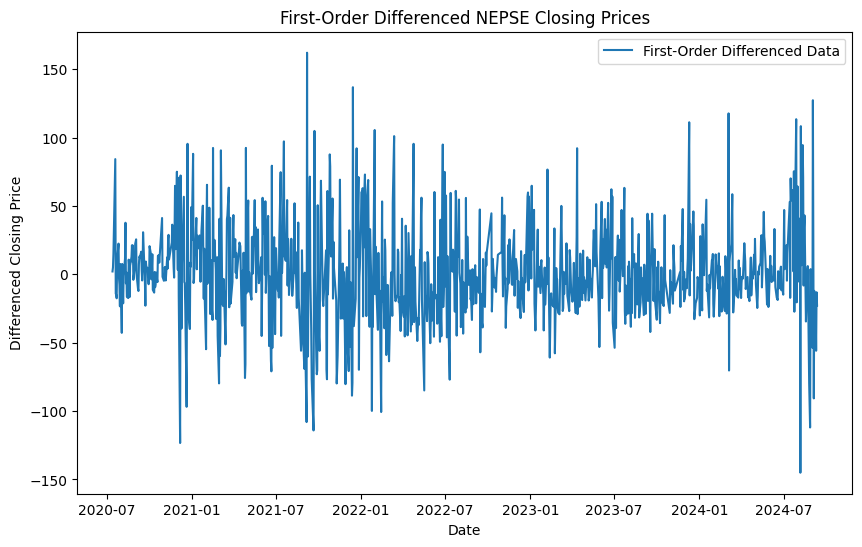

In [10]:
# Apply first-order differencing
close_data_diff = close_data.diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(close_data_diff, label='First-Order Differenced Data')
plt.title('First-Order Differenced NEPSE Closing Prices')
plt.ylabel('Differenced Closing Price')
plt.xlabel('Date')
plt.legend()
plt.show()

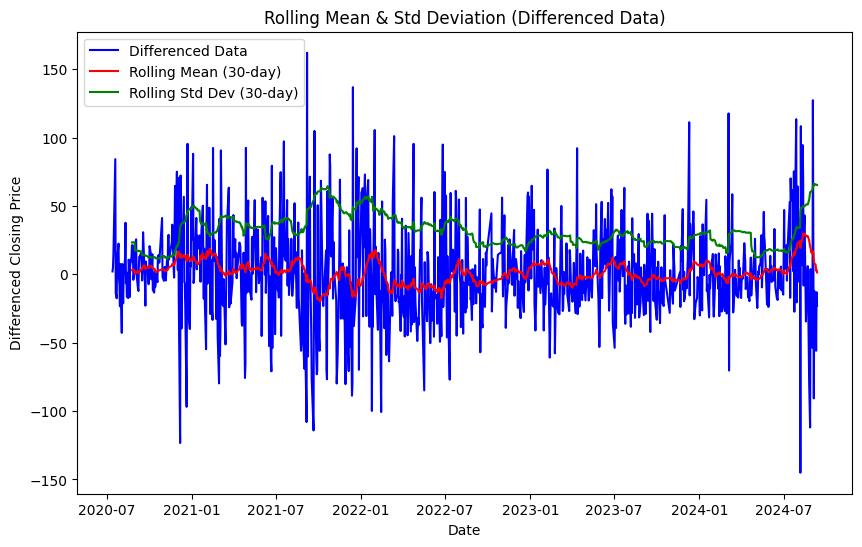

In [11]:
# Rolling Mean and Rolling Std Dev for Differenced Data
plt.figure(figsize=(10, 6))
rolling_mean_diff = close_data_diff.rolling(window=30).mean()
rolling_std_diff = close_data_diff.rolling(window=30).std()
plt.plot(close_data_diff, label='Differenced Data', color='blue')
plt.plot(rolling_mean_diff, label='Rolling Mean (30-day)', color='red')
plt.plot(rolling_std_diff, label='Rolling Std Dev (30-day)', color='green')
plt.title('Rolling Mean & Std Deviation (Differenced Data)')
plt.xlabel('Date')
plt.ylabel('Differenced Closing Price')
plt.legend()
plt.show()


In [12]:
# Perform ADF test on differenced data
adf_result = adfuller(close_data_diff)

# Output ADF test results in the desired format
print(f"ADF Statistic: {adf_result[0]}")
print(f"p-value: {adf_result[1]}")
for key, value in adf_result[4].items():
    print(f"Critical Value {key}: {value}")

ADF Statistic: -7.908331122970904
p-value: 4.010322451674833e-12
Critical Value 1%: -3.4370266558635914
Critical Value 5%: -2.864487711945291
Critical Value 10%: -2.5683395116993872


In [13]:
# Perform KPSS test on differenced data
kpss_result = kpss(close_data_diff, regression='c')

# Output KPSS test results in the desired format
print(f"KPSS Test Statistic: {kpss_result[0]}")
print(f"p-value: {kpss_result[1]}")
for key, value in kpss_result[3].items():
    print(f"Critical Value {key}: {value}")

KPSS Test Statistic: 0.2742036592828263
p-value: 0.1
Critical Value 10%: 0.347
Critical Value 5%: 0.463
Critical Value 2.5%: 0.574
Critical Value 1%: 0.739


C:\Users\user\AppData\Local\Temp\ipykernel_19320\3799092462.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(close_data_diff, regression='c')


In [14]:
# Split the data (80% for training, 20% for testing)
train_size = int(len(close_data) * 0.8)
train_data = close_data[:train_size]
test_data = close_data[train_size:]

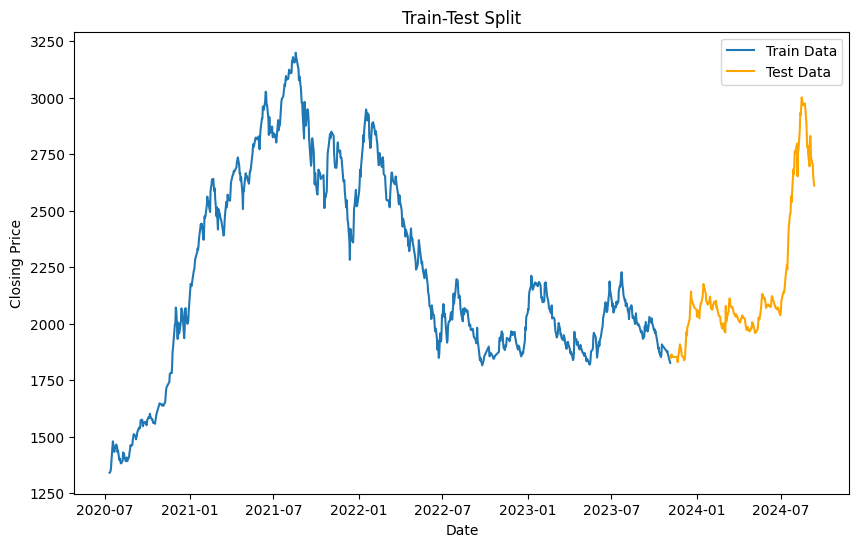

In [15]:
# Plot the train and test data
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Train Data')
plt.plot(test_data, label='Test Data', color='orange')
plt.title('Train-Test Split')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.legend()
plt.show()

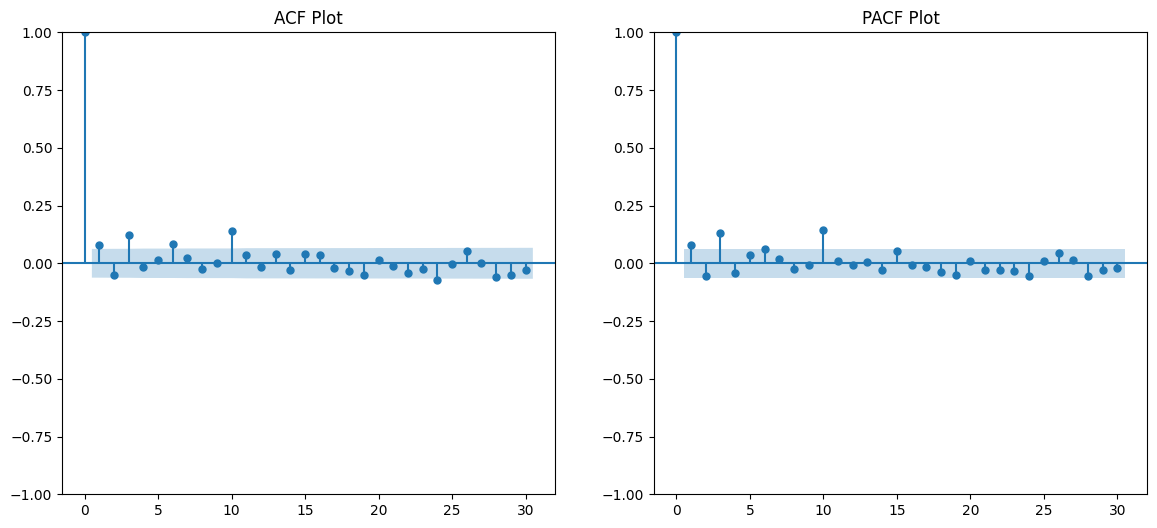

In [16]:
# Plot ACF and PACF
plt.figure(figsize=(14, 6))

plt.subplot(121)
plot_acf(close_data_diff, lags=30, ax=plt.gca())
plt.title('ACF Plot')

plt.subplot(122)
plot_pacf(close_data_diff, lags=30, ax=plt.gca())
plt.title('PACF Plot')

plt.show()


In [17]:
# ARIMA Model Training and Prediction

In [18]:
train = [i for i in train_data]
test = [i for i in test_data]
prediction = []

for i in test:
    # Build ARIMA model (p=3, d=1, q=3)
    arima_model = ARIMA(train, order=(3, 1, 3))
    arima_model_fit = arima_model.fit()
    
    # Make predictions on test data
    forecast = arima_model_fit.forecast()[0]
    prediction.append(forecast)
    train.append(i)

# Convert predictions to pandas Series with test data index
forecast_series = pd.Series(prediction, index=test_data.index)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimizat

In [82]:
!pip install pmdarima


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [83]:
import pmdarima as pm

# Automatically select the best ARIMA order using auto_arima
auto_model = pm.auto_arima(train, start_p=0, start_q=0,
                           max_p=5, max_q=5, seasonal=False,
                           stepwise=True, trace=True)

# Print the summary of the best model
print(auto_model.summary())

# Fit the best model
arima_model_fit = auto_model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9842.164, Time=0.22 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9838.045, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9837.149, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9841.532, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9826.982, Time=0.92 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=9827.526, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=9827.891, Time=1.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=9833.528, Time=0.48 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=9837.008, Time=0.37 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9819.766, Time=2.53 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=9822.806, Time=1.78 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=9823.105, Time=2.41 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=9823.326, Time=1.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=9821.184, Time=1.43 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

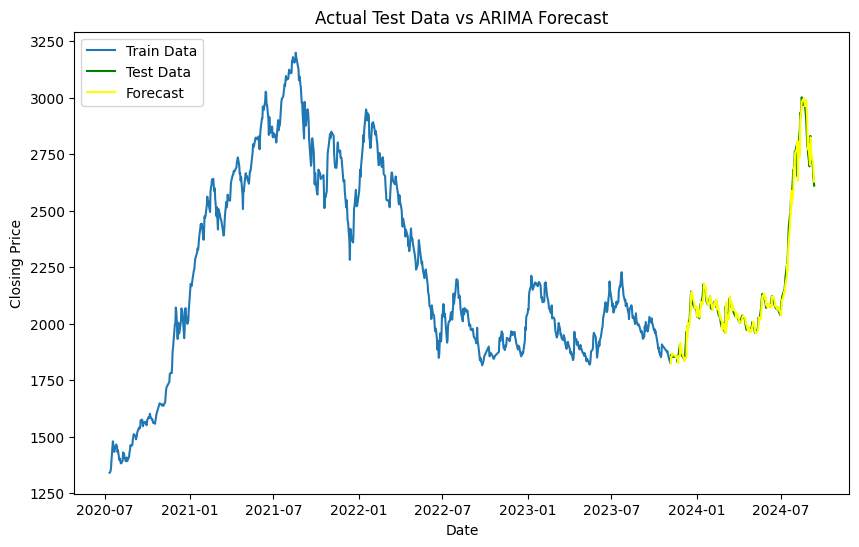

In [75]:
# Plot the forecasted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data, label='Train Data')
plt.plot(test_data.index, test_data, label='Test Data', color='green')
plt.plot(forecast_series.index, forecast_series, label='Forecast', color='yellow')
plt.title('Actual Test Data vs ARIMA Forecast')
plt.ylabel('Closing Price')
plt.xlabel('Date')
plt.legend()
plt.show()

In [40]:
#Error Calculation: We calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Percentage Error (MAPE).

In [81]:
# Calculate MAE, MSE, RMSE
mae = mean_absolute_error(test_data, forecast_series)
mse = mean_squared_error(test_data, forecast_series)
rmse = np.sqrt(mse)
mape = np.mean(np.abs((test_data - forecast_series) / test_data)) * 100

# Print errors
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')


MAE: 23.267148336504118
MSE: 1213.7083921190447
RMSE: 34.83831787154834
MAPE: 1.031960271691925%


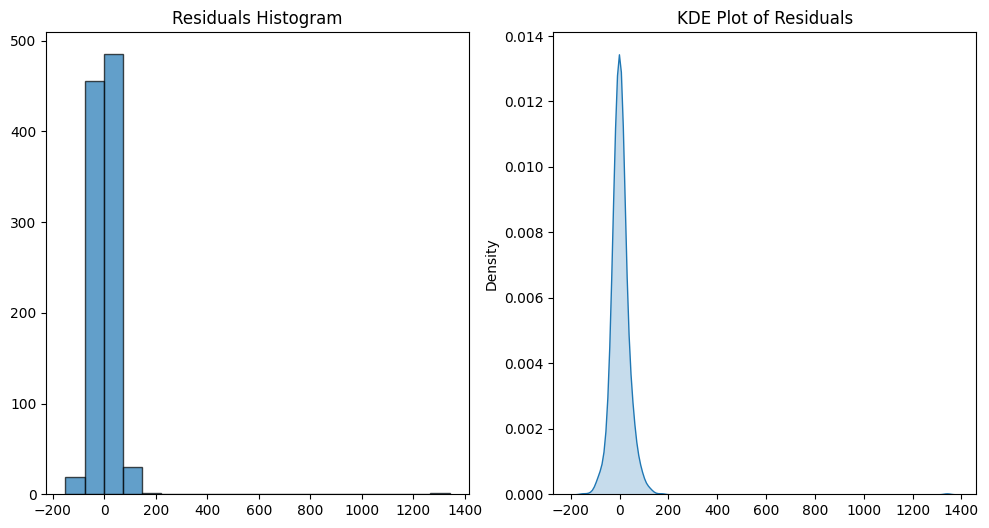

In [42]:
# Plot histogram and KDE of residuals
residual = arima_model_fit.resid

plt.figure(figsize=(12, 6))

plt.subplot(121)
plt.hist(residual, bins=20, edgecolor='k', alpha=0.7)
plt.title('Residuals Histogram')

plt.subplot(122)
sns.kdeplot(residual, fill=True)
plt.title('KDE Plot of Residuals')

plt.show()


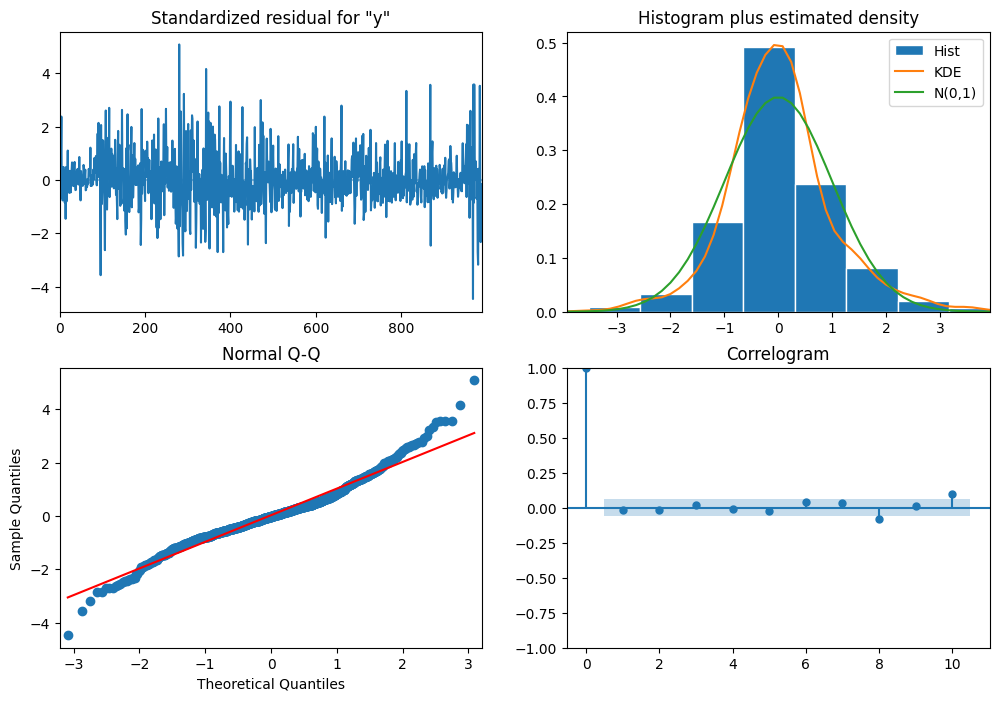

In [73]:
# Plot diagnostics for the ARIMA model
arima_model_fit.plot_diagnostics(figsize=(12, 8))
plt.show()


Forecasted values for the next 30 days:
[2627.85758265 2626.02132861 2618.61848229 2618.43708107 2613.09159273
 2610.89813833 2609.12541425 2605.11731396 2604.988915   2601.54990973
 2600.67809472 2599.19988948 2597.12820276 2596.93800659 2594.82953066
 2594.51190465 2593.3925481  2592.37339268 2592.14165365 2590.90503788
 2590.79345047 2590.00439299 2589.52923946 2589.29862049 2588.60361295
 2588.55556622 2588.03052308 2587.82145538 2587.62157213 2587.24717393]


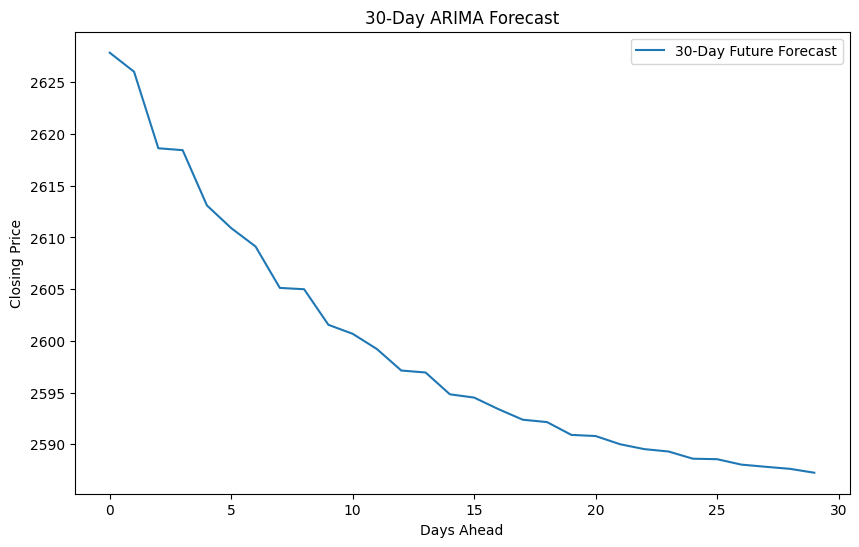

In [63]:
# Future forecast

future_forecast = arima_model_fit.forecast(steps=30)  # Forecast 30 steps ahead
print("Forecasted values for the next 30 days:")
print(future_forecast)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(future_forecast, label='30-Day Future Forecast')
plt.title('30-Day ARIMA Forecast')
plt.ylabel('Closing Price')
plt.xlabel('Days Ahead')
plt.legend() 
plt.show()


In [44]:
forecast_index

DatetimeIndex(['2024-09-12', '2024-09-13', '2024-09-14', '2024-09-15',
               '2024-09-16', '2024-09-17', '2024-09-18', '2024-09-19',
               '2024-09-20', '2024-09-21', '2024-09-22', '2024-09-23',
               '2024-09-24', '2024-09-25', '2024-09-26', '2024-09-27',
               '2024-09-28', '2024-09-29', '2024-09-30', '2024-10-01',
               '2024-10-02', '2024-10-03', '2024-10-04', '2024-10-05',
               '2024-10-06', '2024-10-07', '2024-10-08', '2024-10-09',
               '2024-10-10', '2024-10-11', '2024-10-12', '2024-10-13',
               '2024-10-14', '2024-10-15', '2024-10-16', '2024-10-17',
               '2024-10-18', '2024-10-19', '2024-10-20', '2024-10-21',
               '2024-10-22', '2024-10-23', '2024-10-24', '2024-10-25',
               '2024-10-26', '2024-10-27', '2024-10-28', '2024-10-29',
               '2024-10-30', '2024-10-31', '2024-11-01', '2024-11-02',
               '2024-11-03', '2024-11-04', '2024-11-05', '2024-11-06',
      

In [45]:
test_data.index

DatetimeIndex(['2023-11-06', '2023-11-07', '2023-11-08', '2023-11-09',
               '2023-11-20', '2023-11-21', '2023-11-22', '2023-11-23',
               '2023-11-26', '2023-11-27',
               ...
               '2024-08-29', '2024-09-01', '2024-09-02', '2024-09-03',
               '2024-09-04', '2024-09-05', '2024-09-08', '2024-09-09',
               '2024-09-10', '2024-09-11'],
              dtype='datetime64[ns]', name='Date', length=199, freq=None)

In [64]:
future_forecast

array([2627.85758265, 2626.02132861, 2618.61848229, 2618.43708107,
       2613.09159273, 2610.89813833, 2609.12541425, 2605.11731396,
       2604.988915  , 2601.54990973, 2600.67809472, 2599.19988948,
       2597.12820276, 2596.93800659, 2594.82953066, 2594.51190465,
       2593.3925481 , 2592.37339268, 2592.14165365, 2590.90503788,
       2590.79345047, 2590.00439299, 2589.52923946, 2589.29862049,
       2588.60361295, 2588.55556622, 2588.03052308, 2587.82145538,
       2587.62157213, 2587.24717393])

In [65]:
test[-1]

2610.21

In [66]:
# Forecast the next 30 days
forecast_steps = 30
# Create a new DataFrame to hold the forecasted values
forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=forecast_steps, freq='D')

In [67]:
len(forecast_index)

30

In [69]:
def forecast_npse(days):
    future_forecast = arima_model_fit.forecast(steps=days)
    forecast_index = pd.date_range(start=test_data.index[-1] + pd.Timedelta(days=1), periods=days, freq='D')
    plt.figure(figsize=(10, 6))
    plt.plot(train_data.index, train_data, label='Train Data')
    plt.plot(test_data.index, test_data, label='Test Data', color='green')
    plt.plot(forecast_series.index, forecast_series, label='Forecast', color='yellow')
    plt.plot(forecast_index, future_forecast, label='Future Forecast', color='red')
    plt.title('Observed Data (Train & Test) and Future forecast')
    plt.ylabel('Closing Price')
    plt.xlabel('Date')
    plt.legend()
    plt.show()

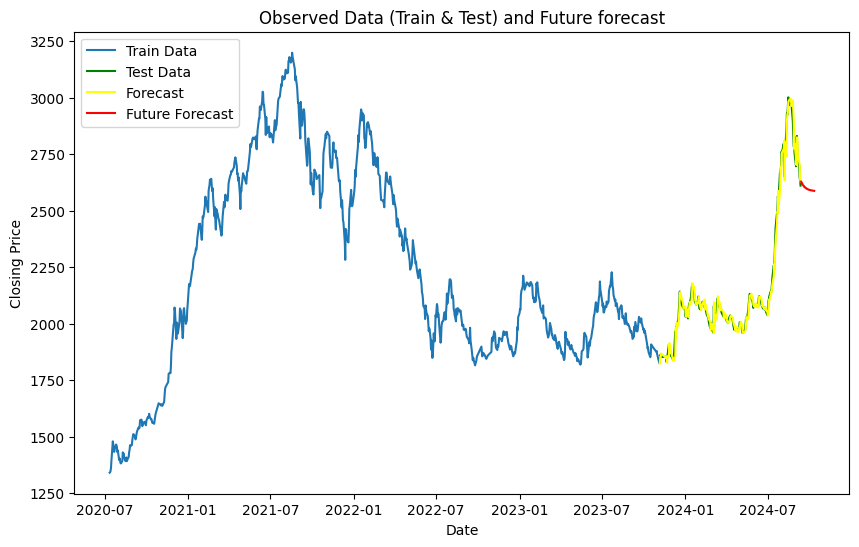

In [60]:
forecast_npse(30)

In [70]:
future_forecast

array([2627.85758265, 2626.02132861, 2618.61848229, 2618.43708107,
       2613.09159273, 2610.89813833, 2609.12541425, 2605.11731396,
       2604.988915  , 2601.54990973, 2600.67809472, 2599.19988948,
       2597.12820276, 2596.93800659, 2594.82953066, 2594.51190465,
       2593.3925481 , 2592.37339268, 2592.14165365, 2590.90503788,
       2590.79345047, 2590.00439299, 2589.52923946, 2589.29862049,
       2588.60361295, 2588.55556622, 2588.03052308, 2587.82145538,
       2587.62157213, 2587.24717393])